In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pt
from statsmodels.tsa.stattools import adfuller
from scipy import stats
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
data = pd.read_csv('C:/Users/Drew/Documents/Datasets/Consumer Electronics/GME_stock.csv')

In [3]:
data.set_index('date', inplace=True)

In [4]:
data.head(20)

,open_price,high_price,low_price,close_price,volume,adjclose_price
date,,,,,,
2021-01-28,265.000000,483.000000,112.250000,193.600006,58815800.0,193.600006
2021-01-27,354.829987,380.000000,249.000000,347.510010,93396700.0,347.510010
2021-01-26,88.559998,150.000000,80.199997,147.979996,178588000.0,147.979996
2021-01-25,96.730003,159.179993,61.130001,76.790001,177874000.0,76.790001
2021-01-22,42.590000,76.760002,42.320000,65.010002,196784300.0,65.010002
2021-01-21,39.230000,44.750000,37.000000,43.029999,57079800.0,43.029999
2021-01-20,37.369999,41.189999,36.060001,39.119999,33471800.0,39.119999
2021-01-19,41.549999,45.520000,36.639999,39.360001,74721900.0,39.360001
2021-01-15,38.490002,40.750000,34.009998,35.500000,46752200.0,35.500000


In [5]:
pd.to_datetime(data.index)

DatetimeIndex(['2021-01-28', '2021-01-27', '2021-01-26', '2021-01-25',
               '2021-01-22', '2021-01-21', '2021-01-20', '2021-01-19',
               '2021-01-15', '2021-01-14',
               ...
               '2002-02-27', '2002-02-26', '2002-02-25', '2002-02-22',
               '2002-02-21', '2002-02-20', '2002-02-19', '2002-02-15',
               '2002-02-14', '2002-02-13'],
              dtype='datetime64[ns]', name='date', length=4773, freq=None)

In [6]:
data = data.sort_values(by='date')

In [7]:
data.head()

,open_price,high_price,low_price,close_price,volume,adjclose_price
date,,,,,,
2002-02-13,9.625,10.060,9.525,10.050,19054000.0,6.766666
2002-02-14,10.175,10.195,9.925,10.000,2755400.0,6.733003
2002-02-15,10.000,10.025,9.850,9.950,2097400.0,6.699336
2002-02-19,9.900,9.900,9.375,9.550,1852600.0,6.430017
2002-02-20,9.600,9.875,9.525,9.875,1723200.0,6.648838


In [8]:
data.isnull().sum()

open_price        0
high_price        0
low_price         0
close_price       0
volume            0
adjclose_price    0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4773 entries, 2002-02-13 to 2021-01-28
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   open_price      4773 non-null   float64
 1   high_price      4773 non-null   float64
 2   low_price       4773 non-null   float64
 3   close_price     4773 non-null   float64
 4   volume          4773 non-null   float64
 5   adjclose_price  4773 non-null   float64
dtypes: float64(6)
memory usage: 261.0+ KB


# Data Visualization

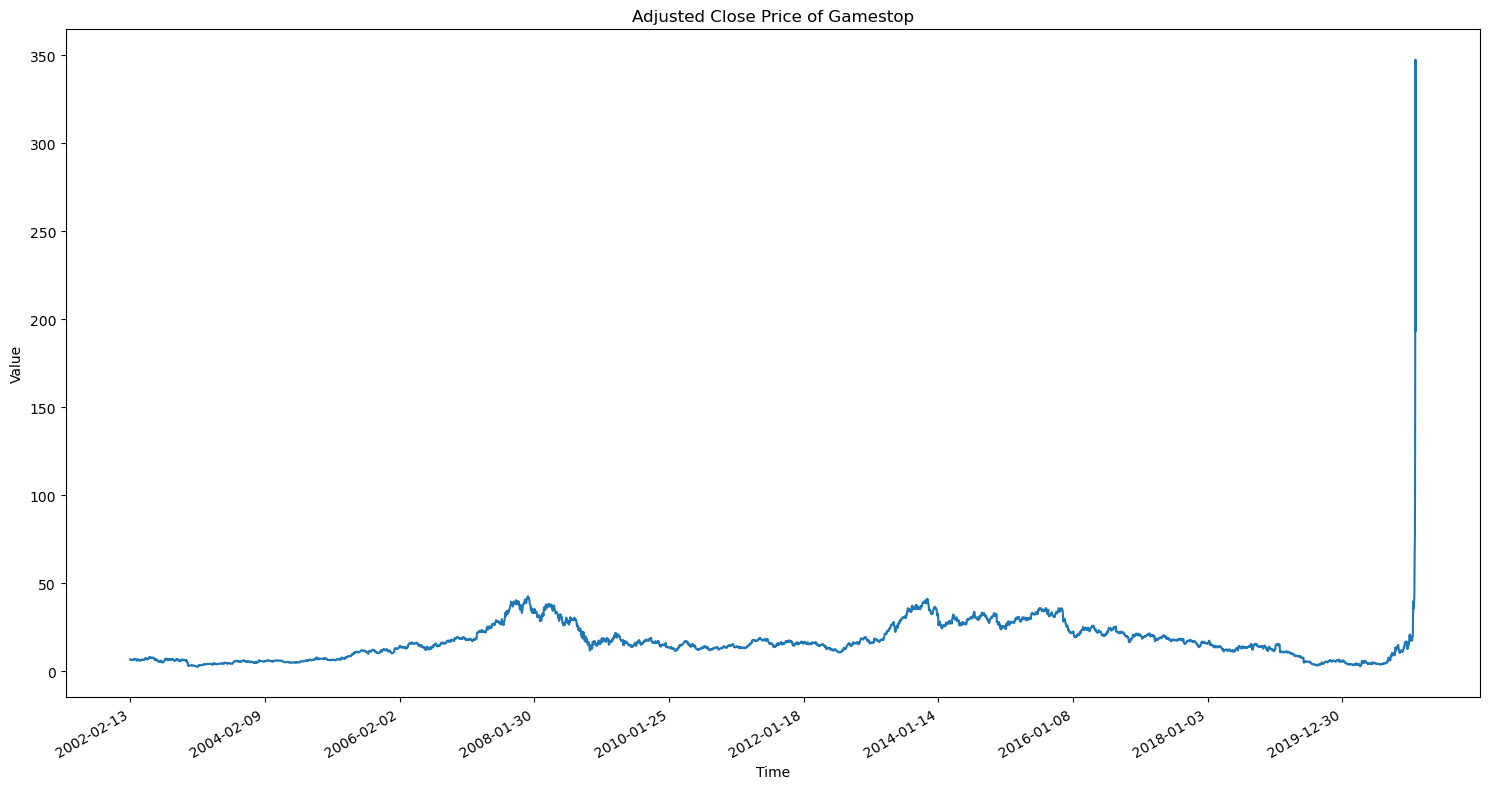

In [9]:
fig, ax = pt.subplots(figsize=(15,8))

ax.plot(data['adjclose_price'], label='Adj Close')
ax.set_title('Adjusted Close Price of Gamestop')
ax.set_xlabel('Time')
ax.set_ylabel('Value')
fig.autofmt_xdate()
pt.xticks(np.arange(0,4773,500))
pt.tight_layout()

The stock seems to have low and stable volatility of adjusted closing price except towards to end there's a day where it suddenly spiked up significantly and falls back down the next day.

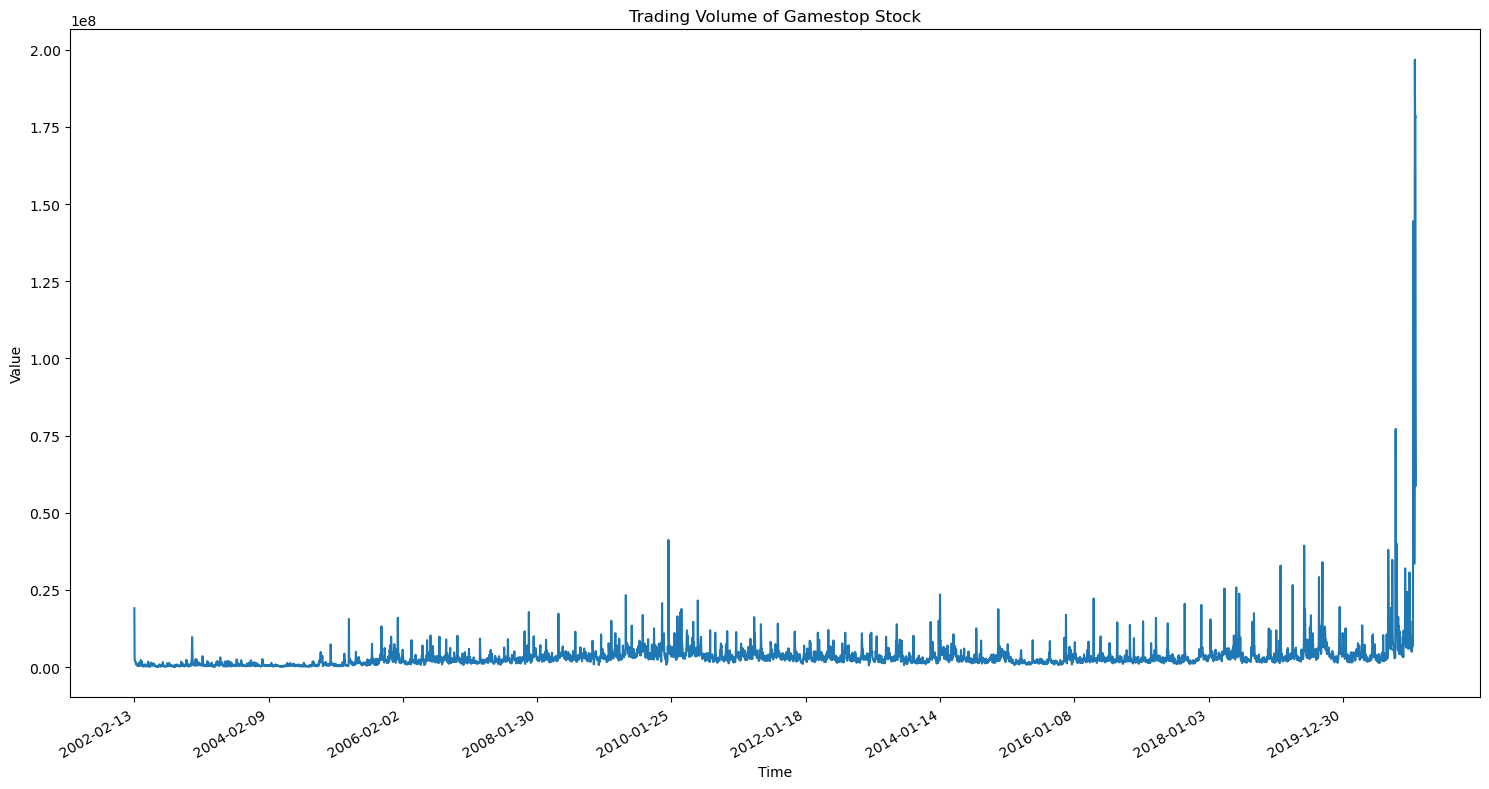

In [10]:
fig, ax = pt.subplots(figsize=(15,8))

ax.plot(data['volume'], label='Volume')
ax.set_title('Trading Volume of Gamestop Stock')
ax.set_xlabel('Time')
ax.set_ylabel('Value')
fig.autofmt_xdate()
pt.xticks(np.arange(0,4773,500))
pt.tight_layout()

It seems that year in recent years, 2021, there's a spike in volume. This might be due to Keith Gill influence on the Gamestop stock

https://www.cbsnews.com/news/keith-gill-gamestop-cbs-news-explains/

R-Value:  0.200413018525914
P-Value:  1.9412336883975202e-44
Std Err:  0.00011342974192531475


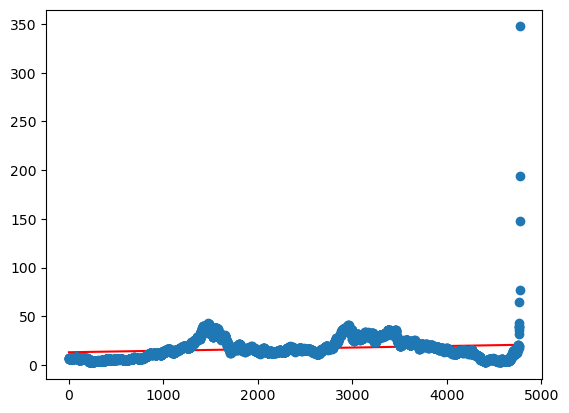

In [11]:
xi = np.arange(0,4773)
y = data['adjclose_price']

slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)

print('R-Value: ' , r_value)
print('P-Value: ' , p_value)
print('Std Err: ' , std_err)

line = slope*xi  + intercept
pt.plot(xi, line, 'r', xi, y, 'o')
pt.show()


The Gamestop stock has a very low presence of linearity with Adj Close Price. Let's see how the ARIMA model performs

In [12]:
std_dev = data['adjclose_price'].std()
print(f' Standard Deviation: {std_dev}')

mean = np.mean(data['adjclose_price'])
print(f' Mean: {mean}')

coef_var = (std_dev / mean)*100
print(f' Coefficient Variance: {coef_var} %')

 Standard Deviation: 11.019953149220532
 Mean: 16.882896867408807
 Coefficient Variance: 65.27288080811383 %


# Moving Average Window

In [13]:
data['Moving Average (10)'] = data['adjclose_price'].rolling(window=10).mean()
data['Moving Average (30)'] = data['adjclose_price'].rolling(window=30).mean()
data['Moving Average (50)'] = data['adjclose_price'].rolling(window=50).mean()
data['Moving Average (100)'] = data['adjclose_price'].rolling(window=100).mean()

In [14]:
data.head(20)

,open_price,high_price,low_price,close_price,volume,adjclose_price,Moving Average (10),Moving Average (30),Moving Average (50),Moving Average (100)
date,,,,,,,,,,
2002-02-13,9.625,10.060,9.525,10.050,19054000.0,6.766666,NaN,NaN,NaN,NaN
2002-02-14,10.175,10.195,9.925,10.000,2755400.0,6.733003,NaN,NaN,NaN,NaN
2002-02-15,10.000,10.025,9.850,9.950,2097400.0,6.699336,NaN,NaN,NaN,NaN
2002-02-19,9.900,9.900,9.375,9.550,1852600.0,6.430017,NaN,NaN,NaN,NaN
2002-02-20,9.600,9.875,9.525,9.875,1723200.0,6.648838,NaN,NaN,NaN,NaN
2002-02-21,9.840,9.925,9.750,9.850,1744200.0,6.632006,NaN,NaN,NaN,NaN
2002-02-22,9.925,9.925,9.600,9.675,881400.0,6.514178,NaN,NaN,NaN,NaN
2002-02-25,9.650,9.825,9.540,9.750,863400.0,6.564678,NaN,NaN,NaN,NaN
2002-02-26,9.700,9.850,9.545,9.750,690400.0,6.564678,NaN,NaN,NaN,NaN


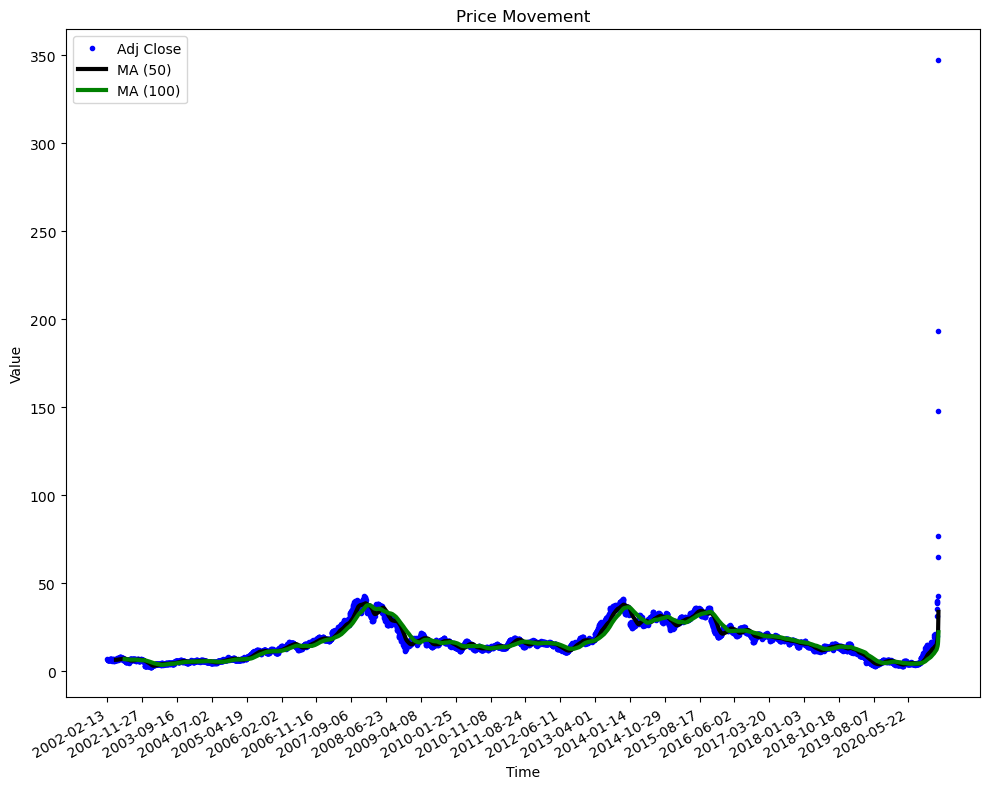

In [15]:
fig, ax = pt.subplots(figsize=(10,8))

ax.plot(data['adjclose_price'], 'b.', label='Adj Close')
ax.plot(data['Moving Average (50)'], 'k-',label='MA (50)', linewidth=3)
ax.plot(data['Moving Average (100)'], 'g-',label='MA (100)', linewidth=3)
ax.set_title('Price Movement')
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.legend(loc=2)
pt.xticks(np.arange(0,4773, 200))
fig.autofmt_xdate()
pt.tight_layout()

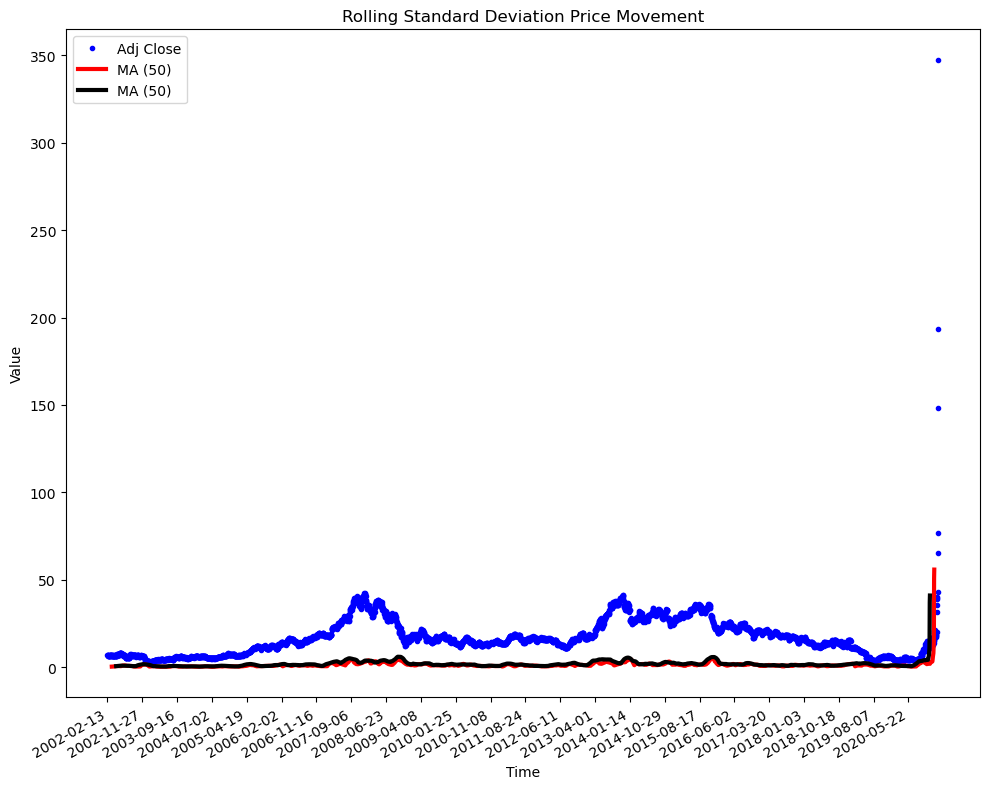

In [17]:
fig, ax = pt.subplots(figsize=(10,8))

ax.plot(data['adjclose_price'], 'b.', label='Adj Close')
ax.plot(data['adjclose_price'].rolling(window=50, center=True).std(), 'r-', label='MA (50)', linewidth=3)
ax.plot(data['adjclose_price'].rolling(window=100, center=True).std(), 'k-',label='MA (50)', linewidth=3)
ax.set_title('Rolling Standard Deviation Price Movement')
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.legend(loc=2)
pt.xticks(np.arange(0,4773, 200))
fig.autofmt_xdate()
pt.tight_layout()

The standard deviation is fairly constant

pct_change() in this case is basically calculating the percentage change of the current element from previous element. In this case, Adj Close price the current day and the previous day. 

In [16]:
data['Daily Return'] = data['adjclose_price'].pct_change()
data.head()

,open_price,high_price,low_price,close_price,volume,adjclose_price,Moving Average (10),Moving Average (30),Moving Average (50),Moving Average (100),Daily Return
date,,,,,,,,,,,
2002-02-13,9.625,10.060,9.525,10.050,19054000.0,6.766666,NaN,NaN,NaN,NaN,NaN
2002-02-14,10.175,10.195,9.925,10.000,2755400.0,6.733003,NaN,NaN,NaN,NaN,-0.004975
2002-02-15,10.000,10.025,9.850,9.950,2097400.0,6.699336,NaN,NaN,NaN,NaN,-0.005000
2002-02-19,9.900,9.900,9.375,9.550,1852600.0,6.430017,NaN,NaN,NaN,NaN,-0.040201
2002-02-20,9.600,9.875,9.525,9.875,1723200.0,6.648838,NaN,NaN,NaN,NaN,0.034031


In [17]:
data.tail()

,open_price,high_price,low_price,close_price,volume,adjclose_price,Moving Average (10),Moving Average (30),Moving Average (50),Moving Average (100),Daily Return
date,,,,,,,,,,,
2021-01-22,42.590000,76.760002,42.320000,65.010002,196784300.0,65.010002,35.091000,22.937333,19.3438,14.8823,0.510807
2021-01-25,96.730003,159.179993,61.130001,76.790001,177874000.0,76.790001,41.001000,25.041667,20.6576,15.5834,0.181203
2021-01-26,88.559998,150.000000,80.199997,147.979996,178588000.0,147.979996,53.805000,29.503667,23.3822,16.9867,0.927074
2021-01-27,354.829987,380.000000,249.000000,347.510010,93396700.0,347.510010,86.561001,40.643667,30.1098,20.3847,1.348358
2021-01-28,265.000000,483.000000,112.250000,193.600006,58815800.0,193.600006,102.781001,46.673000,33.7616,22.2425,-0.442894


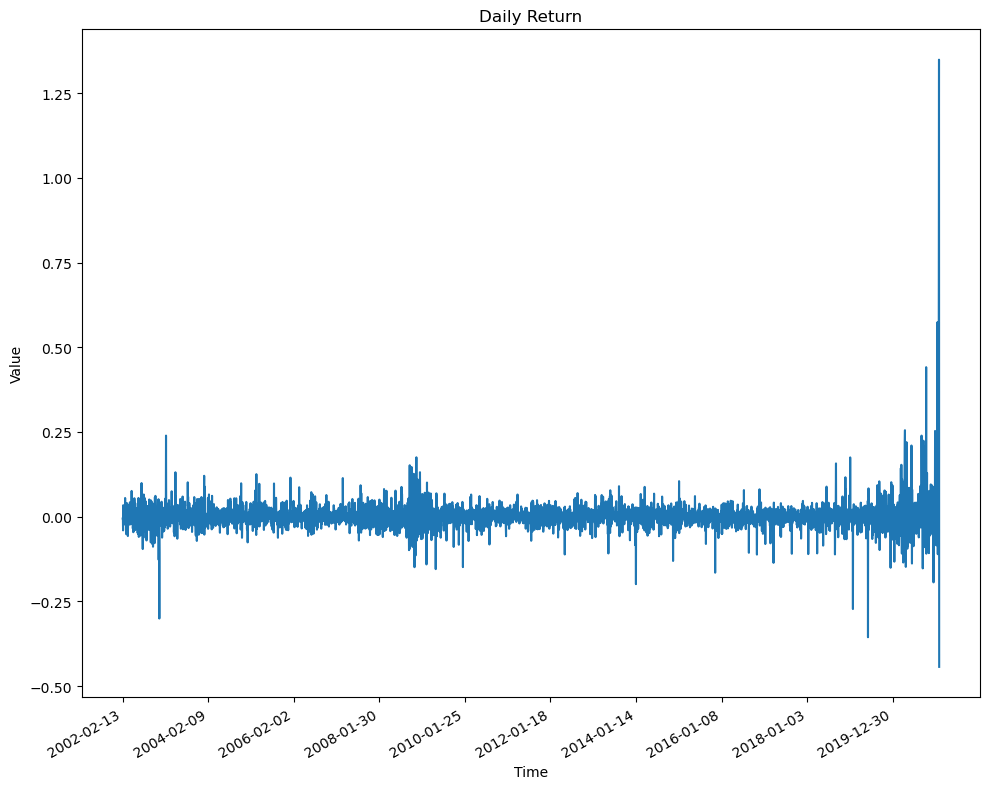

In [18]:
fig, ax = pt.subplots(figsize=(10,8))

ax.plot(data['Daily Return'], label='Daily Return')
ax.set_title('Daily Return')
ax.set_xlabel('Time')
ax.set_ylabel('Value')
pt.xticks(np.arange(0,4773,500))
fig.autofmt_xdate()
pt.tight_layout()

Only the lowest price of the day is relevant to our Adjusted Closing Price

# Stationary Check

In [19]:
adf_results = adfuller(data['adjclose_price'])
print(f' ADF Statistic: {adf_results[0]}')
print(f' P-Value: {adf_results[1]}')

 ADF Statistic: 0.9117347397332952
 P-Value: 0.99324157275546


In [20]:
adf_results = adfuller(np.diff(data['adjclose_price'], n=1))
print(f' ADF Statistic: {adf_results[0]}')

if adf_results[1] < 0.05:
    print(f' P-Value: {adf_results[1]}')
    print(' The time series is stationary')
else:
    print(f' P-Value: {adf_results[1]}')
    print('The Time Series is not stationary')

 ADF Statistic: 5.550585608456771
 P-Value: 1.0
The Time Series is not stationary


In [21]:
adf_results = adfuller(np.diff(data['adjclose_price'], n=2))
print(f' ADF Statistic: {adf_results[0]}')

if adf_results[1] < 0.05:
    print(f' P-Value: {adf_results[1]}')
    print(' The time series is stationary')
else:
    print(f' P-Value: {adf_results[1]}')
    print('The Time Series is not stationary')

 ADF Statistic: 4.969066962484841
 P-Value: 1.0
The Time Series is not stationary


In [32]:
adf_results = adfuller(np.diff(data['adjclose_price'], n=3))
print(f' ADF Statistic: {adf_results[0]}')

if adf_results[1] < 0.05:
    print(f' P-Value: {adf_results[1]}')
    print(' The time series is stationary')
else:
    print(f' P-Value: {adf_results[1]}')
    print('The Time Series is not stationary')

 ADF Statistic: -4.1995795708658665
 P-Value: 0.0006599807800723949
 The time series is stationary


In [22]:
data_diff = np.diff(data['adjclose_price'], n=3)

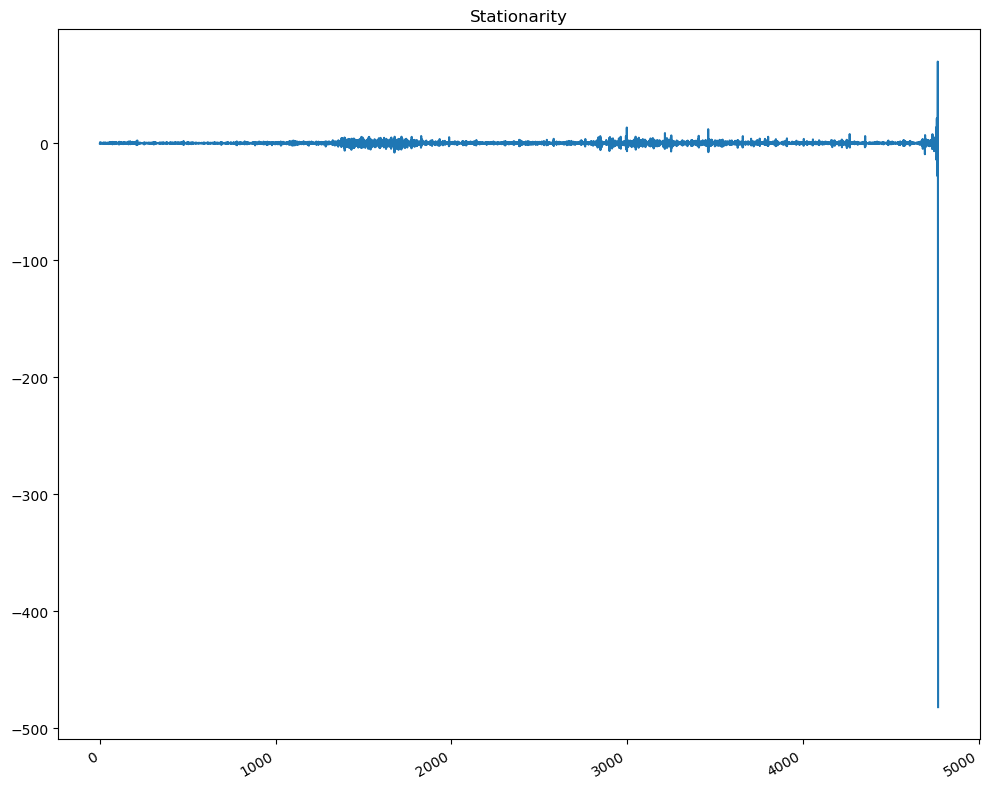

In [23]:
fig, ax = pt.subplots(figsize=(10,8))

ax.plot(data_diff)
ax.set_title('Stationarity')
fig.autofmt_xdate()
pt.tight_layout()

Third-Order integration. It appears that the sudden spike in the stock market on 28th of January 2021 affected the time series's variance at the end

<function plot_acf at 0x0000023ACA604900>


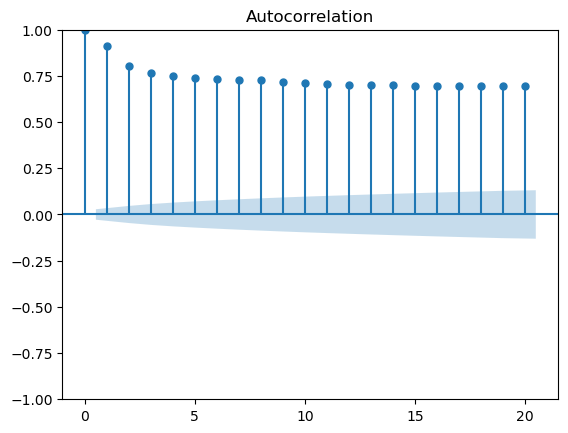

In [24]:
plot_acf(data['adjclose_price'], lags=20)
print(plot_acf)

<function plot_pacf at 0x0000023ACA6047C0>


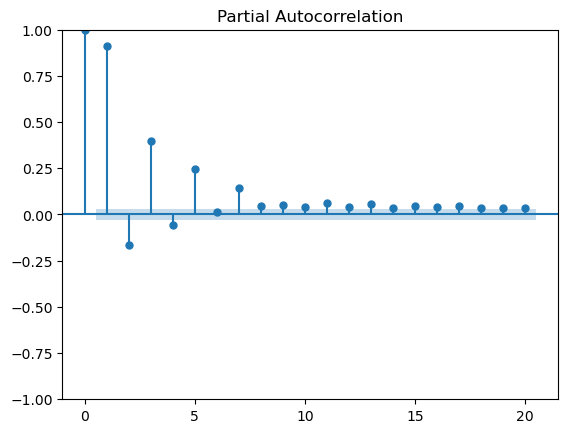

In [25]:
plot_pacf(data['adjclose_price'], lags=20)
print(plot_pacf)

# Model Selection

In [26]:
from typing import Union
from tqdm import tqdm_notebook
from statsmodels.tsa.statespace.sarimax import SARIMAX

def optimize_ARIMA(endog: Union[pd.Series, list], order_list: list, d: int) -> pd.DataFrame:
    results = []  # Initialize an empty list to store results
    for order in tqdm_notebook(order_list):  # Iterate over each unique (p,q) combination. Tqdm_notebook will display a progress bar.
        try:
            # Fit an ARIMA(p,d,q) model using the SARIMAX function.
            model = SARIMAX(endog, order=(order[0], d, order[1]), simple_differencing=False).fit(disp=False)
            aic = model.aic  # Calculate the model AIC
            results.append([order, aic])
        except Exception as e:
            print(f"Error fitting SARIMAX with order {order}: {e}")
            continue

    if not results:
        print("No models were successfully fitted.")
        return pd.DataFrame()  # Return an empty DataFrame if no models were fitted

    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)', 'AIC']

    # Sorting the results in ascending order. The lower the AIC, the better.
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)

    return result_df

In [33]:
from itertools import product

ps = range(0,4,1)
qs = range(0,4,1)
d = 3

arima_list = list(product(ps,qs))

In [34]:
train = data['adjclose_price'][:-262]
test = data['adjclose_price'][-262:]

In [35]:
train.shape

(4511,)

In [36]:
test.shape

(262,)

In [37]:
results = optimize_ARIMA(train, arima_list, d)
results

C:\Users\Drew\AppData\Local\Temp\ipykernel_27400\1285813300.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for order in tqdm_notebook(order_list):  # Iterate over each unique (p,q) combination. Tqdm_notebook will display a progress bar.


  0%|          | 0/16 [00:00<?, ?it/s]

C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates

,"(p,q)",AIC
0,"(2, 3)",6891.315140
1,"(1, 3)",6892.215242
2,"(2, 2)",6894.486713
3,"(3, 3)",6894.533242
4,"(1, 2)",6896.041196
5,"(3, 2)",6898.273646
6,"(0, 2)",6898.352868
7,"(0, 3)",6911.528236
8,"(3, 1)",7889.681429
9,"(2, 1)",8275.924106


Best model is ARIMA(2,3,3). 

In the context of negative number, a value closer to zero is consider larger. Thus, moving from a more negative number to a less negative number is considered ascending. Hence, the larger the negative value away from 0, the smaller the AIC.

# Residual Analysis

C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


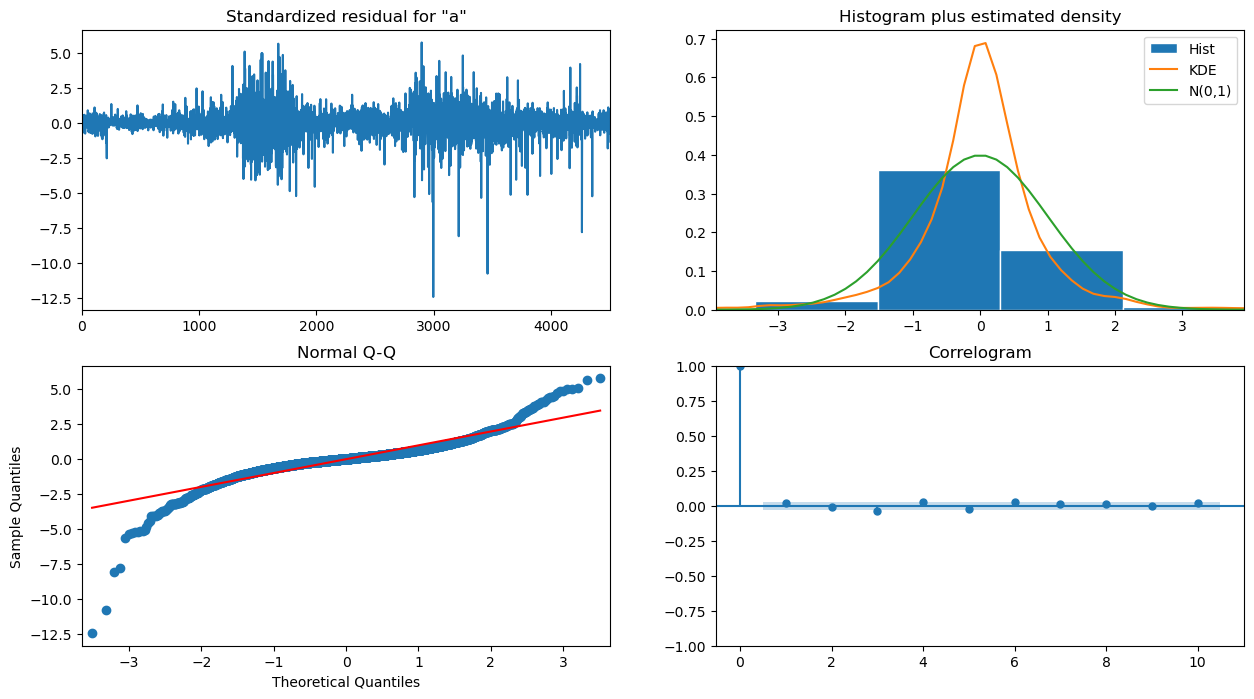

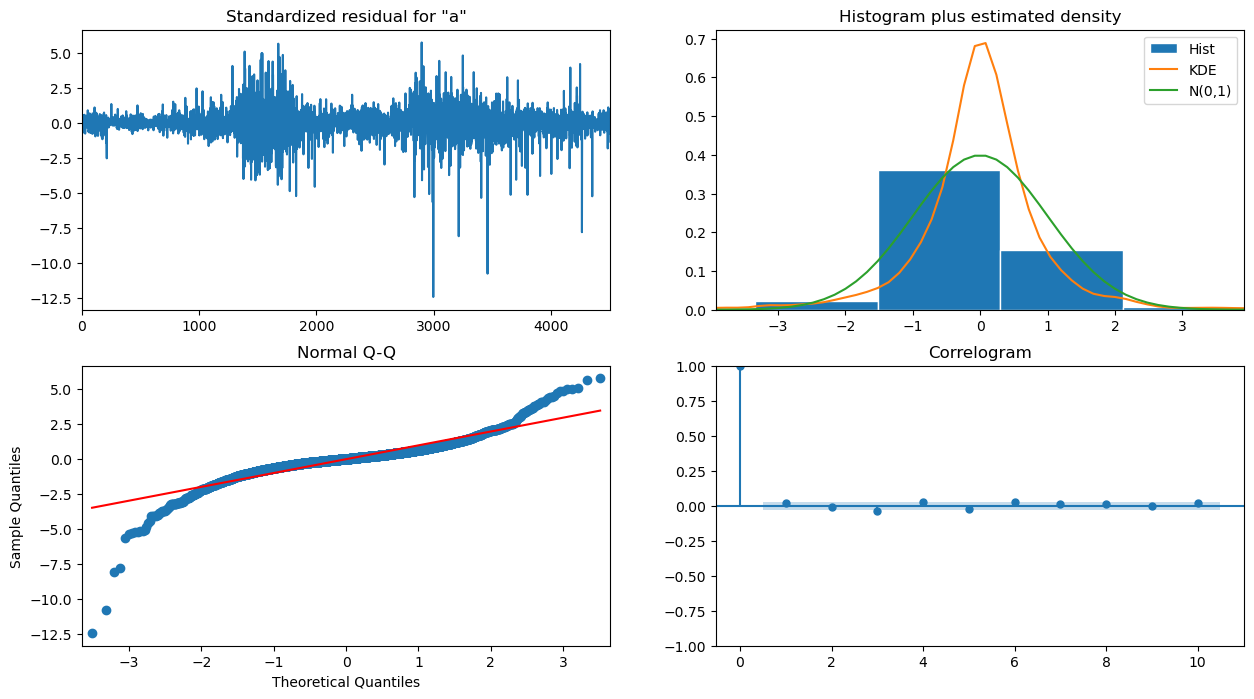

In [38]:
arima_model = SARIMAX(train, order=(2,3,3), simple_differencing=False)
arima_model = arima_model.fit(disp=False)
arima_model.plot_diagnostics(figsize=(15,8))

In [39]:
residuals = arima_model.resid
pvalue = acorr_ljungbox(residuals, np.arange(1,20,1))
print(pvalue)

      lb_stat  lb_pvalue
1    3.080790   0.079222
2    3.080955   0.214279
3   10.133499   0.017465
4   12.910746   0.011720
5   15.275631   0.009247
6   17.372265   0.008008
7   18.127543   0.011408
8   18.621133   0.017023
9   18.662510   0.028220
10  20.509977   0.024782
11  23.061140   0.017327
12  30.979595   0.001984
13  31.648120   0.002708
14  32.349786   0.003572
15  33.392156   0.004141
16  33.688161   0.005983
17  33.842107   0.008799
18  33.913380   0.012909
19  34.608314   0.015562


It appears our acorr_ljungbox test doesn't look too good. Let's proceed with the forecasting anyway to see how it goes.

# Forecasting

In [40]:
def rolling_forecast(data: pd.Series, train_len: int, horizon: int, window: int, method: str) -> list:
    total_len = train_len + horizon
    predictions = []

    for i in range(train_len, total_len, window):
        train_data = data[:i]
        
        if method == 'mean':
            mean_val = np.mean(train_data.values)
            predictions.extend([mean_val] * window)
        
        elif method == 'ARIMA':
            model = SARIMAX(train_data, order=(2, 3, 3))
            res = model.fit(disp=False)
            forecast = res.get_forecast(steps=window)
            pred_mean = forecast.predicted_mean
            predictions.extend(pred_mean)
        
        if len(predictions) >= horizon:
            break

    return predictions[:horizon]

# Predicting the next year stock prices of Gamestop Stock - From 2020-1-28 to 2021-1-28

In [42]:
TRAIN = len(train)
HORIZON = len(test)
WINDOW = 2

pred_arima = rolling_forecast(data['adjclose_price'], TRAIN, HORIZON, WINDOW, 'ARIMA')

C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Drew\anaconda3\Lib

In [43]:
predicted_data = pd.DataFrame({'Actual Data': data['adjclose_price'][-262:]})
predicted_data.head()

,Actual Data
date,
2020-01-15,4.61
2020-01-16,4.62
2020-01-17,4.75
2020-01-21,4.59
2020-01-22,4.56


In [44]:
predicted_data['Predicted Data'] = pred_arima
predicted_data.head()

,Actual Data,Predicted Data
date,,
2020-01-15,4.61,4.722291
2020-01-16,4.62,4.697740
2020-01-17,4.75,4.592615
2020-01-21,4.59,4.558664
2020-01-22,4.56,4.566683


In [45]:
predicted_data.head(20)

,Actual Data,Predicted Data
date,,
2020-01-15,4.61,4.722291
2020-01-16,4.62,4.697740
2020-01-17,4.75,4.592615
2020-01-21,4.59,4.558664
2020-01-22,4.56,4.566683
2020-01-23,4.62,4.534697
2020-01-24,4.32,4.589504
2020-01-27,4.28,4.555331
2020-01-28,4.21,4.265674


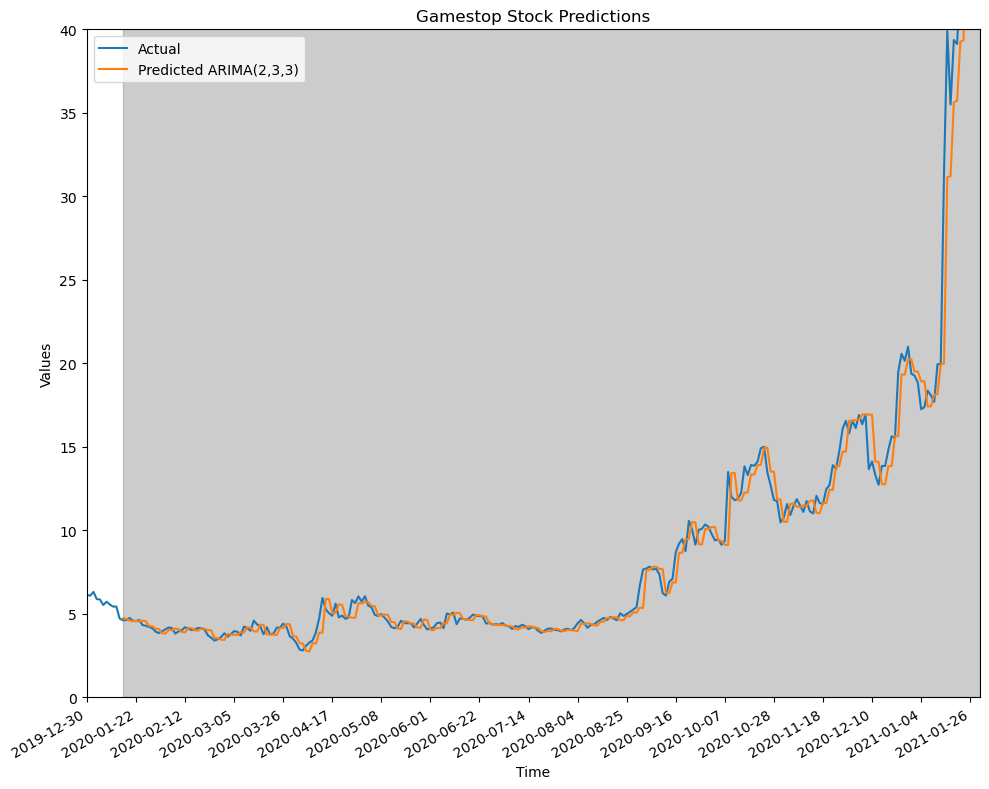

In [46]:
fig, ax = pt.subplots(figsize=(10,8))

ax.plot(data['adjclose_price'], label='Actual')
ax.plot(predicted_data['Predicted Data'], label='Predicted ARIMA(2,3,3)')
ax.set_title('Gamestop Stock Predictions')
ax.set_xlabel('Time')
ax.set_ylabel('Values')
ax.legend(loc=2)
ax.set_xlim(4500, 4773)
ax.set_ylim(0,40)
ax.axvspan(4511, 4773, color="#808080", alpha=0.4)
pt.xticks(np.arange(4500, 4773,15))
fig.autofmt_xdate()
pt.tight_layout()

In [47]:
mse = mean_squared_error(predicted_data['Actual Data'], predicted_data['Predicted Data'])
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 138.45859324562196


In [48]:
mae = mean_absolute_error(predicted_data['Actual Data'], predicted_data['Predicted Data'])
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 1.8359811553171195


In [49]:
var = predicted_data['Predicted Data'].std()**2
print(f' Variance: {var}')

 Variance: 398.07353902261207


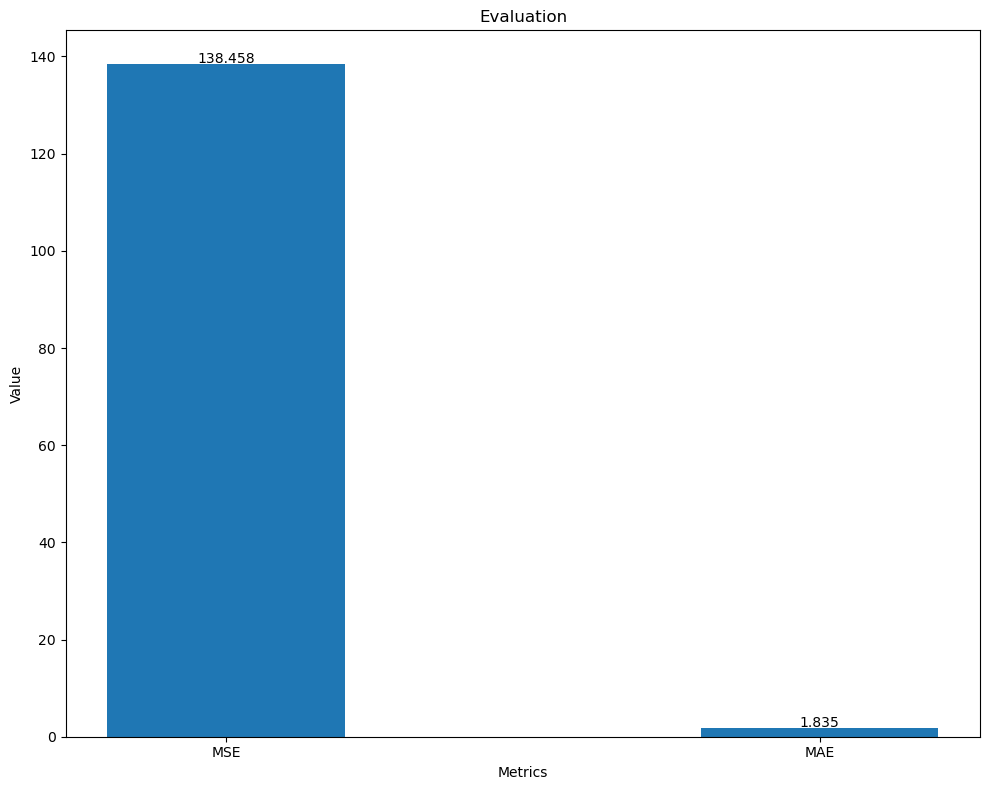

In [50]:
fig, ax = pt.subplots(figsize=(10,8))

X = ['MSE', 'MAE']
y = [138.458, 1.835]

ax.bar(X,y, width=0.4)
ax.set_title('Evaluation')
ax.set_xlabel('Metrics')
ax.set_ylabel('Value')

for index, value in enumerate(y):
    pt.text(x=index, y=value + 0.1, s=str(value), ha='center')

pt.tight_layout()

Again, the model performs even better without XGBoosting, the same as the Apple Stock predictions. The model is able to fit the predictions with actual data relatively well and have a low MSE as well as MAE. Though it has high variance, might be due to that sudden fluctuation.